<a href="https://colab.research.google.com/github/Harishpushpa/classification_python/blob/main/out_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.8.0

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
from glob import glob
from matplotlib import pyplot
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Activation,Dense, Dropout, Flatten

from keras.models import Model

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#''' Data Path '''
#train_path = '/content/drive/MyDrive/LEIS'

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/kermany2018

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100% 10.8G/10.8G [01:16<00:00, 212MB/s]
100% 10.8G/10.8G [01:17<00:00, 151MB/s]


In [ ]:
!unzip /content/kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
train_path ='/content/OCT2017 /train'

In [ ]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['CNV', 'NORMAL', 'DME', 'DRUSEN']


In [ ]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'DRUSEN':3, 'DME':2, 'CNV':1, 'NORMAL':0}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(128,128))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
    count=count+1

In [ ]:
train_images, train_labels = zip(*train_data)


In [ ]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,128,128,3)


In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.5,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 128, 128, 3)
(300, 128, 128, 3)
(300, 2)
(300, 2)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
import tensorflow as tf
model1 = tf.keras.applications.MobileNet (input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='avg')
''' freezing layers '''
model1.trainable = False

In [ ]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(2, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
''' training '''
history=model.fit(data_aug.flow(X_train, y_train, batch_size=16), validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
19/19 [==============================] - 12s 559ms/step - loss: 0.4547 - accuracy: 0.7767 - val_loss: 0.0923 - val_accuracy: 0.9800
Epoch 2/50
19/19 [==============================] - 8s 444ms/step - loss: 0.1243 - accuracy: 0.9500 - val_loss: 0.0428 - val_accuracy: 0.9900
Epoch 3/50
19/19 [==============================] - 7s 393ms/step - loss: 0.0702 - accuracy: 0.9833 - val_loss: 0.0297 - val_accuracy: 0.9967
Epoch 4/50
19/19 [==============================] - 9s 476ms/step - loss: 0.0632 - accuracy: 0.9867 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/50
19/19 [==============================] - 9s 497ms/step - loss: 0.0508 - accuracy: 0.9867 - val_loss: 0.0167 - val_accuracy: 0.9967
Epoch 6/50
19/19 [==============================] - 7s 391ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0327 - val_accuracy: 0.9867
Epoch 7/50
19/19 [==============================] - 10s 517ms/step - loss: 0.0766 - accuracy: 0.9633 - val_loss: 0.0209 - val_accuracy: 0.9900
Epoc

In [ ]:
################ VISUALIZING IMAGES IN INTERMEDIATE LAYERS  #########################################


################   CODE STARTING ##############################



In [ ]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

from sklearn.metrics import classification_report

''' classificaion report '''
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       156
           1       1.00      0.99      0.99       144

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
# Viewing Model Summary
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model.layers)

conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :conv1            output Shape is : (None, 64, 64, 32)
layer name is :conv1_bn            output Shape is : (None, 64, 64, 32)
layer name is :conv1_relu            output Shape is : (None, 64, 64, 32)
layer name is :conv_dw_1            output Shape is : (None, 64, 64, 32)
layer name is :conv_dw_1_bn            output Shape is : (None, 64, 64, 32)
layer name is :conv_dw_1_relu            output Shape is : (None, 64, 64, 32)
layer name is :conv_pw_1            output Shape is : (None, 64, 64, 64)
layer name is :conv_pw_1_bn            output Shape is : (None, 64, 64, 64)
layer name is :conv_pw_1_relu            output Shape is : (None, 64, 64, 64)
layer name is :conv_pad_2            output Shape is : (None, 65, 65, 64)
layer name is :conv_dw_2            output Shape is : (None, 32, 32, 64)
layer name is :conv_dw_2_bn            output Shape is : (None, 32, 32, 64)
layer name is :conv_dw_2_relu            output Shape is : (None, 32, 32, 64)
layer name is :conv_pw_2      

In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[1].output)
M_conv_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
Total params: 864
Trainable params: 0
Non-trainable params: 864
_________________________________________________________________


In [ ]:
###### Loading Sample Image for the above layer
''' loading an image '''
img = load_img("/content/OCT2017 /test/DME/DME-1081406-1.jpeg",target_size=(128,128))

''' converting img to array '''
img = img_to_array(img)

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

feature_maps=M_conv_1.predict(img)

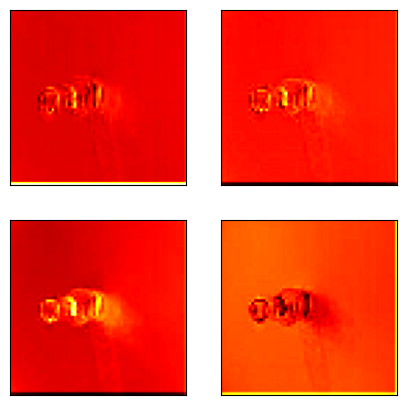

In [ ]:
from matplotlib import pyplot
square=2
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="hot")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[5].output)
M_conv_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

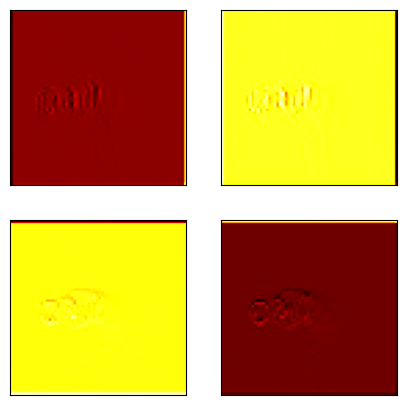

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=2
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="hot")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[10].output)
M_conv_1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

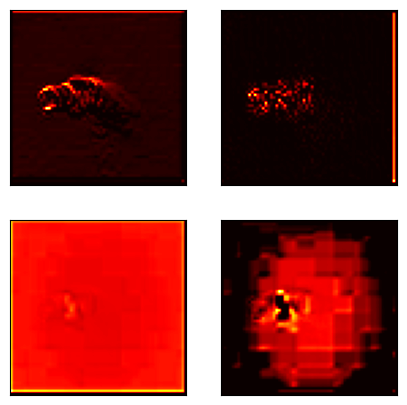

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=2
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="hot")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[14].output)
M_conv_1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

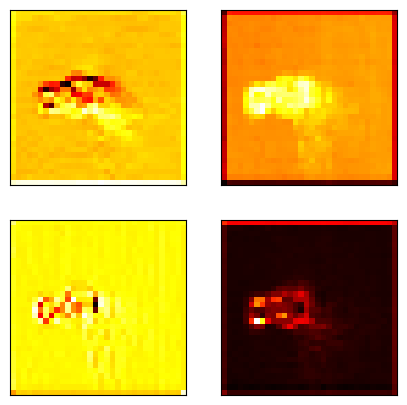

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=2
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="hot")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()



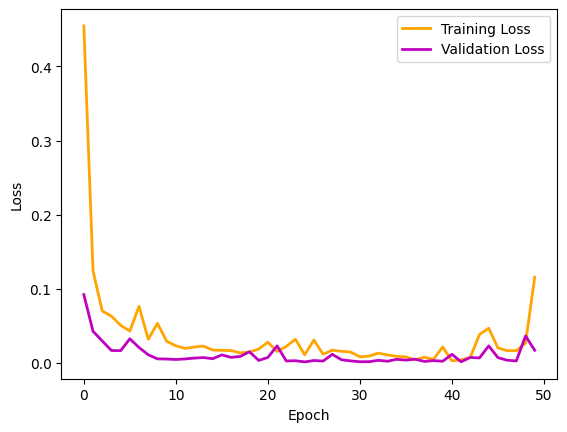

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training loss and validation loss graph '''
epochs = range(50)
plt.plot(epochs, history.history['loss'], 'orange',  label='Training Loss', linewidth=2)
plt.plot(epochs, history.history['val_loss'], 'm',  label='Validation Loss', linewidth=2)
#plt.title('Training vs validation loss')
plt.xlabel('Epoch'); plt.ylabel('Loss');
plt.legend(loc=0)
plt.figure()
plt.show()
pyplot.savefig("Loss.tiff",format="tiff")


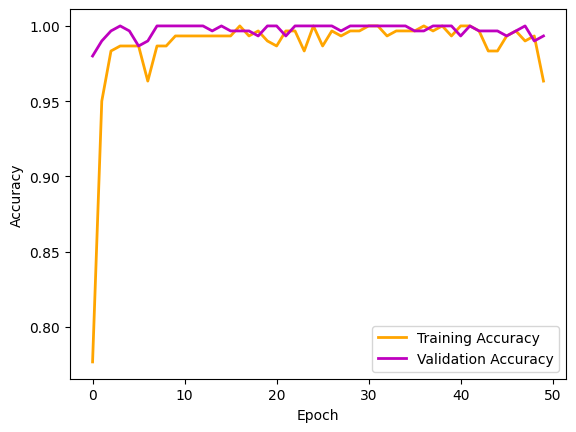

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training accuracy and validation accuracy graph '''
epochs = range(50)
plt.plot(epochs, history.history['accuracy'],'orange',  label='Training Accuracy', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], 'm',  label='Validation Accuracy', linewidth=2)
#plt.title('Training vs validation accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy');
plt.legend(loc=4)
plt.figure()
plt.show()
pyplot.savefig("ACC.tiff",format="tiff")


In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)

In [ ]:
''' checking accuracy score'''
accuracy = accuracy_score(y_test_arg, Y_pred)
print(accuracy)

0.9933333333333333


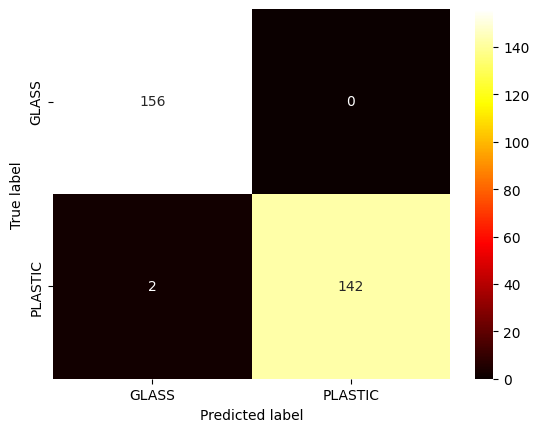

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_arg, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='hot')
# labels, title and ticks
f.set_xlabel('Predicted label');f.set_ylabel('True label');
#f.set_title('Confusion Matrix');
f.xaxis.set_ticklabels(['GLASS', 'PLASTIC']); f.yaxis.set_ticklabels(['GLASS','PLASTIC']);
pyplot.savefig("CM.tiff",format="tiff")

In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)






True Positives: 96
True Negatives: 103
False Positives: 0
False Negatives: 1


In [ ]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate NPV
conf_NPV = (TN / float(TN + FN))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}')
print(f'Mis-Classification: {round(conf_misclassification,4)}')
print(f'Sensitivity: {round(conf_sensitivity,4)}')
print(f'Specificity: {round(conf_specificity,4)}')
print(f'Precision: {round(conf_precision,4)}')
print(f'NPV: {round(conf_NPV,4)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.995
Mis-Classification: 0.005
Sensitivity: 0.9897
Specificity: 1.0
Precision: 1.0
NPV: 0.9904
f_1 Score: 0.99


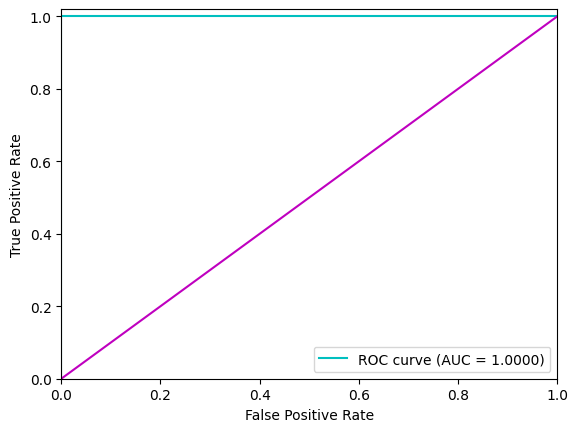

--------------------------------------------------
Accuracy: 0.995
Mis-Classification: 0.005
Sensitivity: 0.9897
Specificity: 1.0
Precision: 1.0
NPV: 0.9904
f_1 Score: 0.99


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

# Calculate mis-classification
conf_misclassification = 1 - conf_accuracy

# Calculate sensitivity
conf_sensitivity = (TP / float(TP + FN))

# Calculate specificity
conf_specificity = (TN / float(TN + FP))

# Calculate precision
conf_precision = (TN / float(TN + FP))

# Calculate NPV
conf_NPV = (TN / float(TN + FN))

# Calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

# Calculate predicted probabilities
y_scores = model.predict_on_batch(X_test)[:, 1]  # Assuming you have a model and input data (X) available

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_arg, y_scores)  # Replace y_true with your true labels

# Calculate AUC score
auc = roc_auc_score(y_test_arg, y_scores)  # Replace y_true with your true labels

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, 'c',  label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'm')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print('-' * 50)
print(f'Accuracy: {round(conf_accuracy, 4)}')
print(f'Mis-Classification: {round(conf_misclassification, 4)}')
print(f'Sensitivity: {round(conf_sensitivity, 4)}')
print(f'Specificity: {round(conf_specificity, 4)}')
print(f'Precision: {round(conf_precision, 4)}')
print(f'NPV: {round(conf_NPV, 4)}')
print(f'f_1 Score: {round(conf_f1, 2)}')


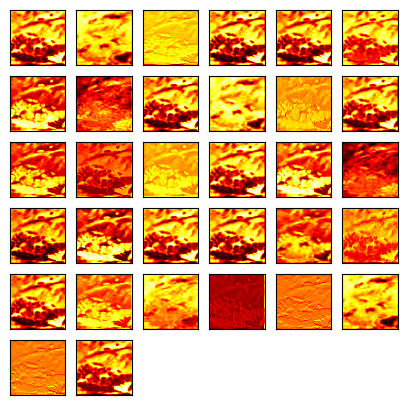

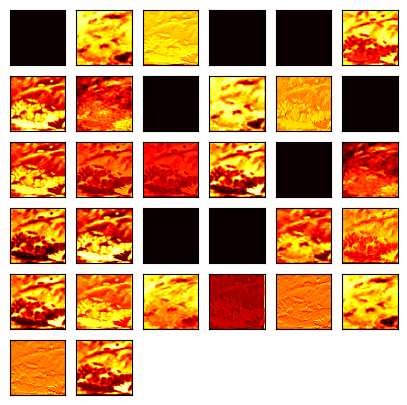

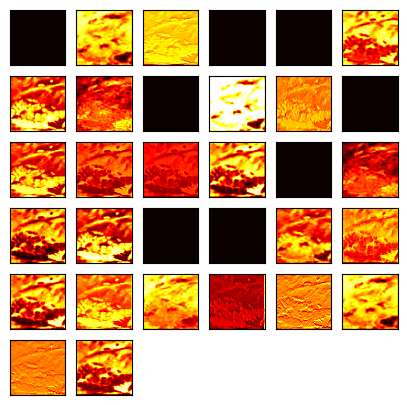

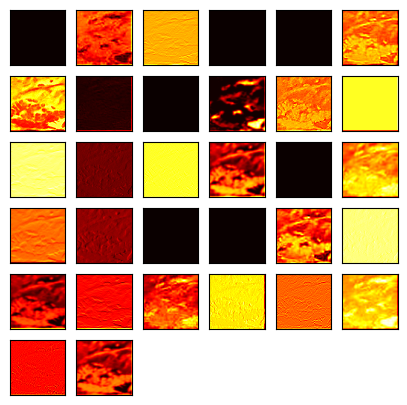

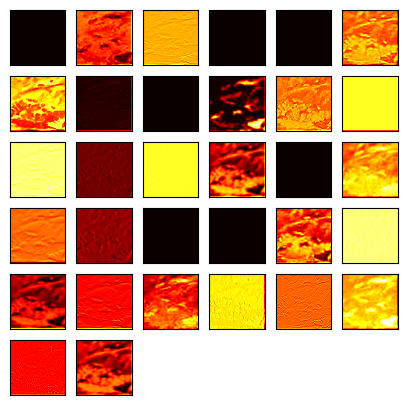

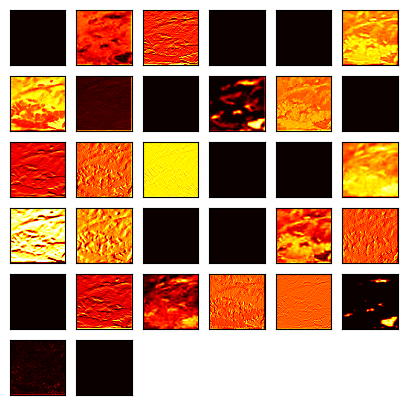

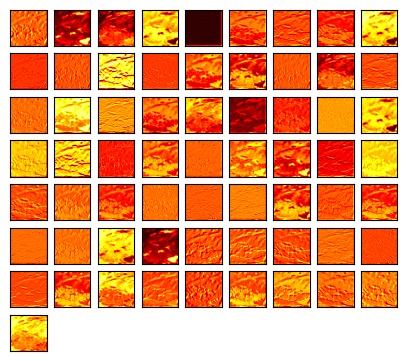

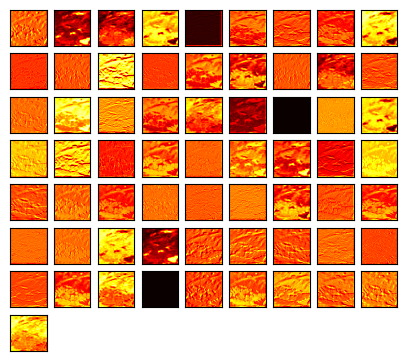

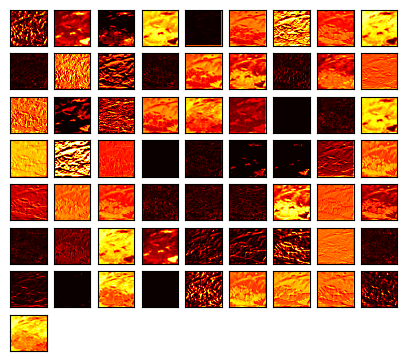

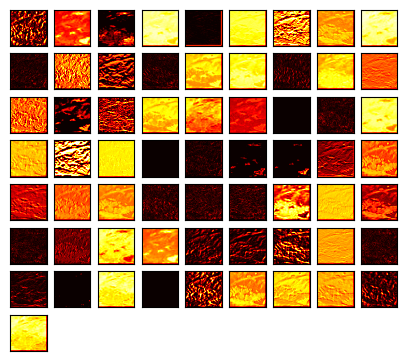

In [ ]:
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt

# Assuming you have a model named 'model'
layer_index_start = 1
layer_index_end = 10

# Iterate through the desired range of layer indices
for layer_index in range(layer_index_start, layer_index_end + 1):
    # Create a sub-model that outputs the feature maps of the current layer
    sub_model = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)

    # Get the feature maps for a sample input
    feature_maps = sub_model.predict(img)

    # Plot the feature maps
    num_feature_maps = feature_maps.shape[-1]
    square = int(num_feature_maps ** 0.5) + 1
    fig = plt.figure(figsize=(5, 5))

    for i in range(num_feature_maps):
        ax = fig.add_subplot(square, square, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        plt.imshow(feature_maps[0, :, :, i], aspect='auto', cmap="hot")

    #plt.suptitle(f"Layer Index: {layer_index}")
    plt.savefig(f"feature_maps_{layer_index}.png", format="png")
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the AlexNet model
model = tf.keras.models.Sequential([
    # Layer 1
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Layer 2
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Layer 3
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Layer 4
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Layer 5
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')  # 1000 is the number of classes in ImageNet
])

# Display the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

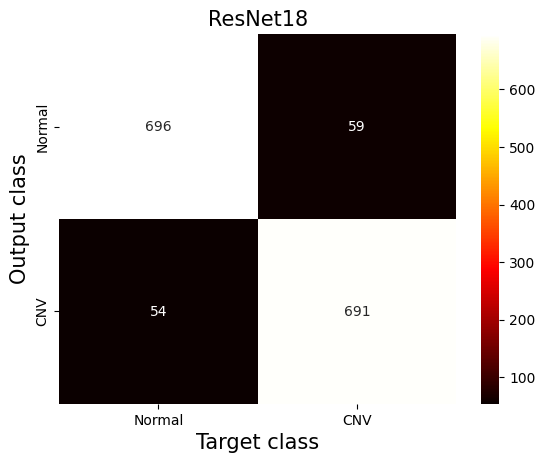

<Figure size 500x500 with 0 Axes>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tp = 696
tn = 691
fp = 59
fn = 54
conf_matrix = np.array([[tp, fp], [fn, tn]])
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['Normal', 'CNV'], yticklabels=['Normal', 'CNV'], cmap='hot')
plt.ylabel("Output class", fontsize=15)
plt.xlabel("Target class", fontsize=15)
plt.title("ResNet18", fontsize=15)
plt.show()
ax=pyplot.figure(figsize=(5,5))